In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#LIBRERÍAS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob

In [ ]:
#RUTAS
ruta_data = '/content/drive/MyDrive/BOOTCAMP_SQL/BASES_DATOS//'

### LECTURA DE INFORMACIÓN

In [ ]:
name_excel = '0_DATOS_MINERIA.xlsx'

#DF con información
area_reserva_declarada = pd.read_excel(f'{ruta_data}{name_excel}', sheet_name = 'Areas_de_Reserva_Especial_Decla')[['AREA_HA', 'ID', 'NOMBRE', 'MINERALES', 'DEPARTAMEN', 'MUNICIPIOS']]
area_reserva_tramite = pd.read_excel(f'{ruta_data}{name_excel}', sheet_name = 'Area_de_Reserva_Especial_en_Tra')[['AREA_HA', 'CODIGO_EXP', 'NOMBRE', 'MINERALES', 'DEPARTAMEN', 'MUNICIPIOS']]
titulos_vigentes = pd.read_excel(f'{ruta_data}{name_excel}', sheet_name = 'Titulo_Vigente.dbf')[['AREA_HA', 'FECHA_DE_I', 'ESTADO', 'MODALIDAD', 'ETAPA', 'MINERALES', 'PTO_PTI', 'DEPARTAMEN', 'MUNICIPIOS']]
titulos_vigentes = titulos_vigentes[titulos_vigentes['DEPARTAMEN'] != ' ']

In [ ]:
titulos_vigentes

,AREA_HA,FECHA_DE_I,ESTADO,MODALIDAD,ETAPA,MINERALES,PTO_PTI,DEPARTAMEN,MUNICIPIOS
0,119.7453,2024-10-23,Activo,CONTRATO DE CONCESIÓN (L 685),Exploración,ARCILLAS,,Antioquia,AMALFI
1,80.4081,2021-05-19,Activo,CONTRATO DE CONCESIÓN (L 685),Exploración,"ARENAS, GRAVAS, RECEBO",,Córdoba,MONTERÍA
2,54.4925,2021-09-09,Activo,CONTRATO DE CONCESIÓN (L 685),Construcción y montaje,ARENAS,,Bolívar,SAN ESTANISLAO
3,12.2424,2022-08-09,Activo,CONTRATO DE CONCESIÓN (L 685),Exploración,"MINERALES DE ORO Y SUS CONCENTRADOS, MINERALES...",,Antioquia,ABRIAQUÍ
4,251.7088,2021-12-24,Activo,CONTRATO DE CONCESIÓN (L 685),Exploración,"MINERALES DE ORO Y SUS CONCENTRADOS, MINERALES...",,Bolívar,NOROSÍ
...,...,...,...,...,...,...,...,...,...
2995,23.5865,2001-10-17,Activo,CONTRATO DE CONCESIÓN (L 685),Explotación,"ARENAS, GRAVAS",PTO,Cundinamarca,GUADUAS
2996,3.9862,2019-10-02,Activo,CONTRATO ESPECIAL DE CONCESIÓN,Explotación,"ARCILLA COMUN (ARCILLA CERAMICA), ARCILLA FERR...",PTO,Huila,PITALITO
2997,8.5170,1995-02-01,Activo,CONTRATO DE CONCESIÓN (L 685),Explotación,ARCILLA COMUN (ARCILLA CERAMICA),PTI,Cundinamarca,COGUA
2998,0.1451,2009-12-31,Activo,CONTRATO DE CONCESIÓN (L 685),Explotación,"DEMAS_CONCESIBLES, MINERAL DE ORO",,Caldas,MARMATO


In [ ]:
titulos_vigentes['DEPARTAMEN'].unique()

array(['Antioquia', 'Córdoba', 'Bolívar', 'Magdalena', 'La Guajira',
       'Norte de Santander', 'Atlántico', 'Huila', 'Meta', 'Cesar',
       'Cundinamarca', 'Santander', 'Casanare', 'Boyacá', 'Arauca',
       'Caldas', 'Risaralda', 'Valle del Cauca',
       'Bogotá D.C., Cundinamarca', 'Cundinamarca, Tolima', 'Tolima',
       'Valle del Cauca, Cauca', 'Chocó', 'Caldas, Risaralda', 'Nariño',
       'Bogotá D.C.', 'Boyacá, Cundinamarca', 'Cauca',
       'Risaralda, Valle del Cauca', 'Putumayo', 'Caquetá',
       'Antioquia, Bolívar', 'Antioquia, Boyacá', 'Quindío',
       'Quindío, Valle del Cauca', 'Vichada', 'Antioquia, Caldas',
       'Nariño, Cauca', 'Casanare, Meta', 'Arauca, Casanare',
       'Caldas, Tolima', 'Sucre', 'Putumayo, Cauca', 'Vaupés', 'Guaviare',
       'Cesar, Norte de Santander', 'Antioquia, Chocó',
       'Boyacá, Casanare', 'Cauca, Huila', 'Antioquia, Córdoba',
       'Cesar, Magdalena', 'Antioquia, Santander', 'Boyacá, Santander',
       'Atlántico, Bolívar', '

Se evidencia que en las cols *DEPARTAMEN* Y *MINERALES* hay filas que tienen valores separados por comas, por lo que se procede a separar estos datos para una mejor interpretación

In [ ]:
#Se separa los dptos cuando un mismo título tiene dos dptos
cols_separacion = ['DEPARTAMEN', 'MINERALES']
for col_revisa in cols_separacion:
    titulos_vigentes[col_revisa] = titulos_vigentes[col_revisa].str.split(',')
    titulos_vigentes[col_revisa] = titulos_vigentes[col_revisa].apply(lambda x: [i.strip() for i in x])
    titulos_vigentes = titulos_vigentes.explode(col_revisa, ignore_index=True)

    titulos_vigentes[col_revisa] = titulos_vigentes[col_revisa].str.split(',')
    titulos_vigentes[col_revisa] = titulos_vigentes[col_revisa].apply(lambda x: [i.strip() for i in x])
    titulos_vigentes = titulos_vigentes.explode(col_revisa, ignore_index=True)


In [ ]:
#SE MIRA LO MINERALES QUE ESTÁN TITULADOS Y SU % TOTAL
minerales_titulos_vigentes = titulos_vigentes['MINERALES'].value_counts().sort_values(ascending=False).to_frame()
minerales_titulos_vigentes['porc_%'] = (minerales_titulos_vigentes['count']/minerales_titulos_vigentes['count'].sum())*100

In [ ]:
#Se evidencia que hay un total de 103 tipos de minerales distintos titulados
minerales_titulos_vigentes

,count,porc_%
MINERALES,,
GRAVAS,755,7.880180
ARENAS,659,6.878196
MINERAL DE ORO,587,6.126709
RECEBO,515,5.375222
CARBÓN TÉRMICO,482,5.030790
...,...,...
MINERAL DE TITANIO,1,0.010437
MINERAL DE CROMO,1,0.010437
OTRAS PIEDRAS SEMIPRECIOSAS,1,0.010437


In [ ]:
#SE ESTABLECE QUE LAS PRIMERAS 50 CATEGORÍAS DE MINERALES REPRESENTAN CASI EL 97 % de la totalidad de los minerales
minerales_titulos_vigentes.iloc[:50,1].sum()

96.90011481056258

In [ ]:
# De acuerdo a estos 50 primeros tipos de minerales se establecen categorías que permitan agrupar los minerales en 16 categorías
minerales_titulos_vigentes.iloc[:50,1].index

Index(['GRAVAS', 'ARENAS', 'MINERAL DE ORO', 'RECEBO', 'CARBÓN TÉRMICO',
       'CARBÓN METALÚRGICO', 'ANTRACITA', 'ROCA O PIEDRA CALIZA',
       'ARCILLA COMUN (ARCILLA CERAMICA)', 'ARCILLA MISCELANEA',
       'ARENAS SILICEAS', 'ARCILLAS REFRACTARIAS', 'MINERAL DE PLATA',
       'BASALTO', 'DEMAS_CONCESIBLES', 'GRAVAS (DE RIO)', 'ARENAS ARCILLOSAS',
       'ARENAS INDUSTRIALES', 'ARENAS FELDESPÁTICAS', 'ASFALTO NATURAL',
       'DIABASA', 'ARENAS (DE RIO)', 'ARCILLAS',
       'MINERALES DE ORO Y SUS CONCENTRADOS', 'CARBÓN', 'ESMERALDA',
       'MINERAL DE PLATINO', 'ARENISCAS', 'ARCILLA FERRUGINOSA',
       'MINERAL DE COBRE', 'ARCILLAS CAOLINITICAS',
       'MINERALES DE PLATA Y SUS CONCENTRADOS', 'PUZOLANA', 'MINERAL DE ZINC',
       'ROCAS DE ORIGEN VOLCÁNICO', 'RODIO', 'OSMIO) Y SUS CONCENTRADOS',
       'RUTENIO', 'PALADIO', 'MINERALES DE PLATINO (INCLUYE PLATINO',
       'MINERAL DE MOLIBDENO', 'BENTONITA',
       'MINERALES DE COBRE Y SUS CONCENTRADOS', 'CAOLIN',
       'MINER

Las categorías establecidas son: ['ARCILLAS Y CAOLINES', 'ARENAS Y GRAVAS', 'BAUXITA', 'CARBÓN',
       'COBRE', 'ESMERALDAS', 'FOSFATOS', 'MOLIBDENO', 'ORO', 'OTROS',
       'PLATA', 'PLATINOIDES', 'PLOMO', 'ROCAS INDUSTRIALES',
       'ROCAS ORNAMENTALES', 'ROCAS VOLCÁNICAS', 'ZINC']

In [ ]:
#FUNCIÓN PARA ASIGNAR CATEGORÍA
def categoria_minerales(datos):
    if 'arenas' in datos.lower() or 'arena' in datos.lower() or 'gravas' in datos.lower(): categoria = 'ARENAS Y GRAVAS'
    elif 'arcilla' in datos.lower() or 'caolin' in datos.lower() or 'bentonita' in datos.lower(): categoria = 'Arcillas y caolines'
    elif 'carbon' in datos.lower() or 'carbón' in datos.lower() or 'antracita' in datos.lower(): categoria = 'CARBÓN'
    elif 'oro' in datos.lower(): categoria = 'ORO'
    elif 'plata' in datos.lower(): categoria = 'PLATA'
    elif 'platino' in datos.lower() or 'paladi' in datos.lower() or 'rodio' in datos.lower() or 'osmio' in datos.lower() or 'rutenio' in datos.lower(): categoria = 'Platinoides'
    elif 'cobre' in datos.lower(): categoria = 'Cobre'
    elif 'molibdeno' in datos.lower(): categoria = 'Molibdeno'
    elif 'zinc' in datos.lower(): categoria = 'Zinc'
    elif 'plomo' in datos.lower(): categoria = 'Plomo'
    elif 'fosfo' in datos.lower(): categoria = 'Fosfatos'
    elif 'piedra' in datos.lower() or 'arenis' in datos.lower() or 'puzolana' in datos.lower() or 'asfalto' in datos.lower() or 'recebo' in datos.lower() or 'construcc' in datos.lower(): categoria = 'Rocas industriales'
    elif 'basalto' in datos.lower() or 'diabasa' in datos.lower() or 'volcánic' in datos.lower() or 'volcanic' in datos.lower(): categoria = 'Rocas volcánicas'
    elif 'marmol' in datos.lower() or 'mármol' in datos.lower(): categoria = 'Rocas ornamentales'
    elif 'bauxita' in datos.lower(): categoria = 'Bauxita'
    elif 'esmeralda' in datos.lower(): categoria = 'Esmeraldas'
    elif 'hierro' in datos.lower() or 'alumini' in datos.lower() or 'estaño' in datos.lower() or 'vanadio' in datos.lower() or 'niquel' in datos.lower() or 'níquel' in datos.lower(): categoria = 'Otros metales (Fe, Al, Sn, V, Ni)'

    else: categoria = 'Otros'

    if categoria != 'Otros metales (Fe, Al, Sn, V, Ni)':
        cat_final = categoria.upper()
    else: cat_final = categoria

    return cat_final


In [ ]:
titulos_vigentes['CATEGORIA_MINERAL'] = titulos_vigentes['MINERALES'].apply(categoria_minerales)

In [ ]:
titulos_vigentes

,AREA_HA,FECHA_DE_I,ESTADO,MODALIDAD,ETAPA,MINERALES,PTO_PTI,DEPARTAMEN,MUNICIPIOS,CATEGORIA_MINERAL
0,119.7453,2024-10-23,Activo,CONTRATO DE CONCESIÓN (L 685),Exploración,ARCILLAS,,Antioquia,AMALFI,ARCILLAS Y CAOLINES
1,80.4081,2021-05-19,Activo,CONTRATO DE CONCESIÓN (L 685),Exploración,ARENAS,,Córdoba,MONTERÍA,ARENAS Y GRAVAS
2,80.4081,2021-05-19,Activo,CONTRATO DE CONCESIÓN (L 685),Exploración,GRAVAS,,Córdoba,MONTERÍA,ARENAS Y GRAVAS
3,80.4081,2021-05-19,Activo,CONTRATO DE CONCESIÓN (L 685),Exploración,RECEBO,,Córdoba,MONTERÍA,ROCAS INDUSTRIALES
4,54.4925,2021-09-09,Activo,CONTRATO DE CONCESIÓN (L 685),Construcción y montaje,ARENAS,,Bolívar,SAN ESTANISLAO,ARENAS Y GRAVAS
...,...,...,...,...,...,...,...,...,...,...
9576,8.5170,1995-02-01,Activo,CONTRATO DE CONCESIÓN (L 685),Explotación,ARCILLA COMUN (ARCILLA CERAMICA),PTI,Cundinamarca,COGUA,ARCILLAS Y CAOLINES
9577,0.1451,2009-12-31,Activo,CONTRATO DE CONCESIÓN (L 685),Explotación,DEMAS_CONCESIBLES,,Caldas,MARMATO,OTROS
9578,0.1451,2009-12-31,Activo,CONTRATO DE CONCESIÓN (L 685),Explotación,MINERAL DE ORO,,Caldas,MARMATO,ORO
9579,5.8025,2009-09-02,Activo,CONTRATO DE CONCESIÓN (L 685),Explotación,BASALTO,PTO,Cauca,TOTORÓ,ROCAS VOLCÁNICAS


In [ ]:
np.unique(titulos_vigentes['CATEGORIA_MINERAL'].values)

array(['ARCILLAS Y CAOLINES', 'ARENAS Y GRAVAS', 'BAUXITA', 'CARBÓN',
       'COBRE', 'ESMERALDAS', 'FOSFATOS', 'MOLIBDENO', 'ORO', 'OTROS',
       'Otros metales (Fe, Al, Sn, V, Ni)', 'PLATA', 'PLATINOIDES',
       'PLOMO', 'ROCAS INDUSTRIALES', 'ROCAS ORNAMENTALES',
       'ROCAS VOLCÁNICAS', 'ZINC'], dtype=object)

#### EXPLORACIÓN DATOS TÍTULOS VIGENTES

In [ ]:
#DEPARTAMENTOS CON MAYOR CANTIDAD DE ÁREA TITULADA
dptos_area_titulada = titulos_vigentes.groupby('DEPARTAMEN')['AREA_HA'].sum().sort_values(ascending=False).to_frame()
dptos_area_titulada['%_AREA'] = (dptos_area_titulada['AREA_HA']/dptos_area_titulada['AREA_HA'].sum())*100

In [ ]:
dptos_area_titulada

,AREA_HA,%_AREA
DEPARTAMEN,,
Antioquia,1.464137e+06,22.907828
Chocó,9.916376e+05,15.515119
Cauca,8.019347e+05,12.547035
Valle del Cauca,6.807194e+05,10.650505
La Guajira,5.308778e+05,8.306091
Bolívar,4.576084e+05,7.159721
Boyacá,2.735509e+05,4.279966
Córdoba,1.880310e+05,2.941925
Norte de Santander,1.721678e+05,2.693730


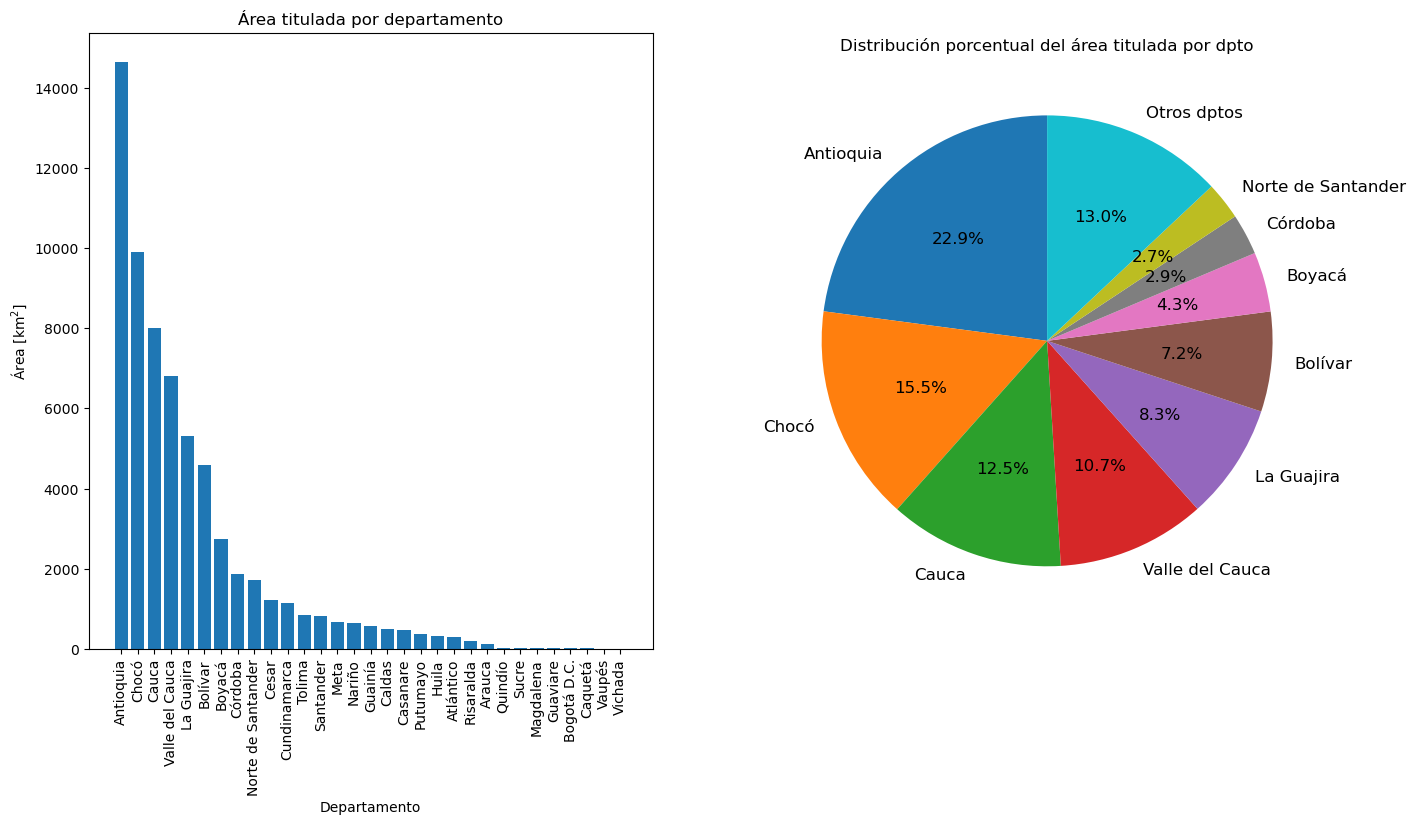

In [ ]:
#Grafica área titulada por cada departamento
fig, ax = plt.subplots(1,2, figsize =(16,8))

#barras
ax[0].bar(dptos_area_titulada.index, (dptos_area_titulada['AREA_HA']/100).values)
ax[0].set_title(f'Área titulada por departamento')
ax[0].set_xlabel('Departamento')
ax[0].set_ylabel(f'Área [km$^2$]')
ax[0].tick_params(axis='x', labelrotation=90)

# Porcentaje
top10 = dptos_area_titulada['%_AREA'][:9]
otros_dptos = dptos_area_titulada['%_AREA'][9:].sum()
labels = list(top10.index) + ['Otros dptos']
valores_porc = list(top10.values) + [otros_dptos]
ax[1].pie(valores_porc, labels = labels, startangle=90, autopct='%1.1f%%', textprops={'fontsize': 12})
ax[1].set_title('Distribución porcentual del área titulada por dpto')
plt.show()

In [ ]:
titulos_vigentes.columns

Index(['AREA_HA', 'FECHA_DE_I', 'ESTADO', 'MODALIDAD', 'ETAPA', 'MINERALES',
       'PTO_PTI', 'DEPARTAMEN', 'MUNICIPIOS', 'CATEGORIA_MINERAL'],
      dtype='object')

In [ ]:
#MINERALES CON MAYOR ÁREA TITULADA
minerales_area_titulada = titulos_vigentes.groupby('CATEGORIA_MINERAL')['AREA_HA'].sum().sort_values(ascending=False).to_frame()
minerales_area_titulada['%_AREA'] = (minerales_area_titulada['AREA_HA']/minerales_area_titulada['AREA_HA'].sum())*100
minerales_area_titulada

,AREA_HA,%_AREA
CATEGORIA_MINERAL,,
PLATINOIDES,1.089826e+06,17.051375
ORO,1.087407e+06,17.013522
CARBÓN,8.622919e+05,13.491381
PLATA,7.827222e+05,12.246438
ARENAS Y GRAVAS,6.618114e+05,10.354672
OTROS,4.280831e+05,6.697770
COBRE,2.453169e+05,3.838218
ROCAS INDUSTRIALES,2.305535e+05,3.607231
MOLIBDENO,2.212763e+05,3.462079


Los minerales que están en la categoría ***OTROS*** se muestran a continuación:

In [ ]:
titulos_vigentes[titulos_vigentes['CATEGORIA_MINERAL'] == 'OTROS']['MINERALES'].unique()

array(['DEMAS_CONCESIBLES', 'FELDESPATOS', 'YESO', 'MAGNESITA', 'MICA',
       'TALCO', 'DOLOMITA', 'MINERAL DE ANTIMONIO', 'MINERAL DE MERCURIO',
       'MINERAL DE MANGANESO', 'MINER', 'CUARZO', 'GRANITO', 'ANHIDRITA',
       'ASBESTO', 'AZUFRE', 'CALCITA', 'CAO', 'SERPENTINITA',
       'SULFATO DE BARIO NATURAL-BARITINA', 'CARB', 'SAL MARINA',
       'SAL GEMA', 'MINERALES DE ANTIMONIO Y SUS CONCENTRADOS',
       'MINERALES DE MERCURIO Y SUS CONCENTRADOS', 'MINERAL', 'GRAFITO',
       'OTRAS ROCAS METAMÓRFICAS', 'MINERAL DE', '', 'ROCAS DE CUARCITA',
       'MINERAL DE CIRCONIO', 'MINERALES DE NIOBIO',
       'MINERALES DE TANTALIO', 'MINERAL DE URANIO',
       'OTROS MINERALES DE METALES NO FERROSOS Y SUS CONCENTRADOS (EXCEPTO MINERALES DE URANIO O TORIO Y SUS CONCENTRADOS)',
       'MINERAL DE COBALTO', 'MINERAL DE CROMO', 'MINERAL DE TITANIO',
       'MINERAL DE WOLF'], dtype=object)

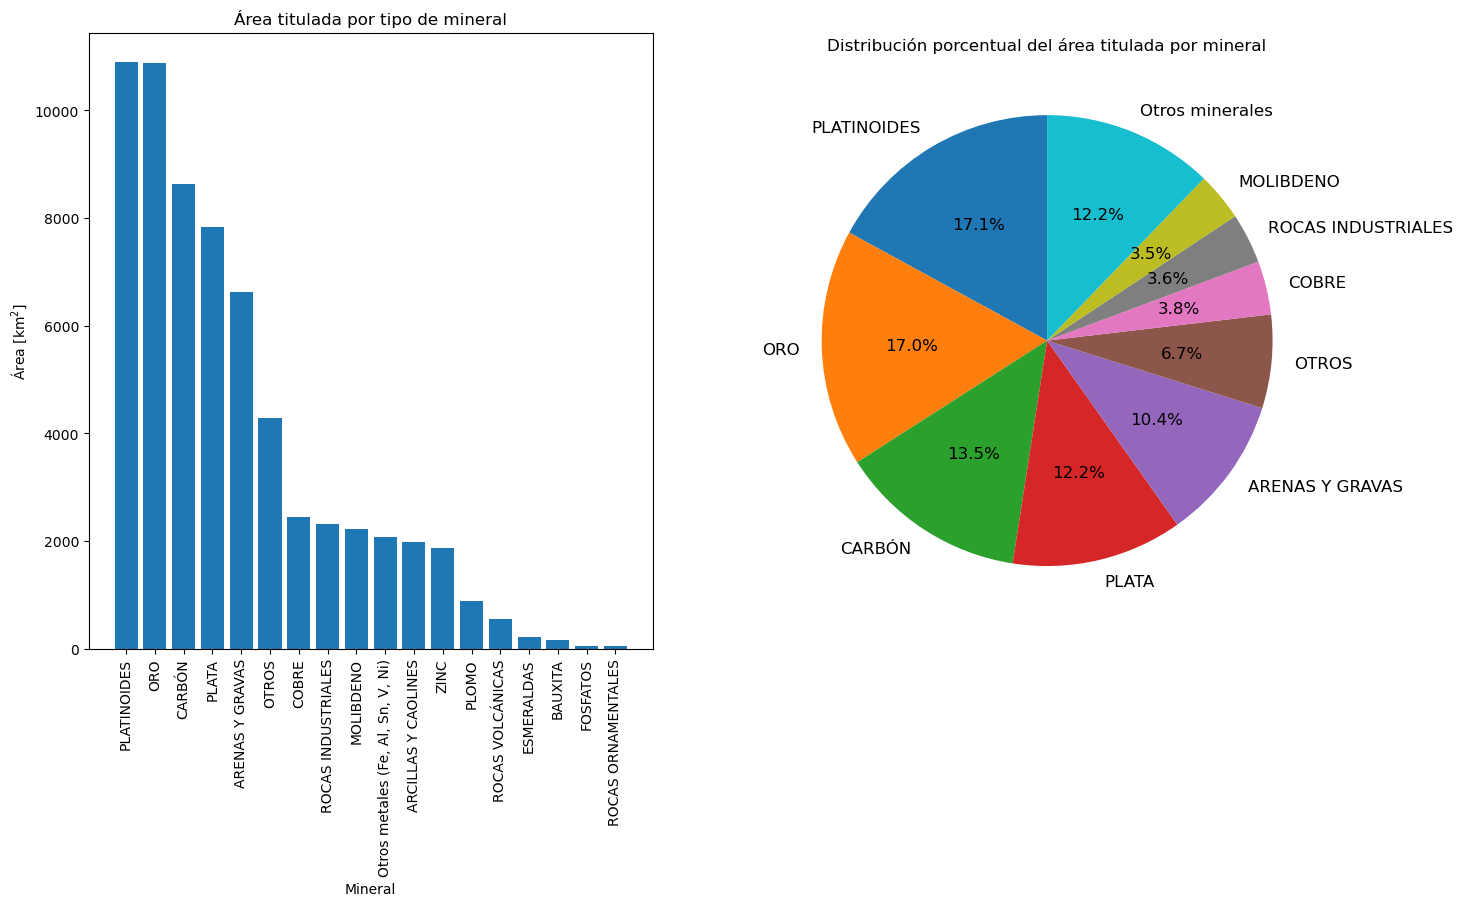

In [ ]:
#Grafica área titulada por cada departamento
fig, ax = plt.subplots(1,2, figsize =(16,8))

#barras
ax[0].bar(minerales_area_titulada.index, (minerales_area_titulada['AREA_HA']/100).values)
ax[0].set_title(f'Área titulada por tipo de mineral')
ax[0].set_xlabel('Mineral')
ax[0].set_ylabel(f'Área [km$^2$]')
ax[0].tick_params(axis='x', labelrotation=90)

# Porcentaje
top10 = minerales_area_titulada['%_AREA'][:9]
otros_minerales = minerales_area_titulada['%_AREA'][9:].sum()
labels = list(top10.index) + ['Otros minerales']
valores_porc = list(top10.values) + [otros_minerales]
ax[1].pie(valores_porc, labels = labels, startangle=90, autopct='%1.1f%%', textprops={'fontsize': 12})
ax[1].set_title('Distribución porcentual del área titulada por mineral')
plt.show()

In [ ]:
#Se ecplora si hay correlación entre el número de títulos mineros y el área titulada
relacion_num_area = titulos_vigentes.groupby(['CATEGORIA_MINERAL']).agg({'ETAPA': 'count','AREA_HA': 'sum'}).sort_values('AREA_HA', ascending=False)
relacion_num_area['AREA_KM2']= relacion_num_area['AREA_HA']/100
relacion_num_area

,ETAPA,AREA_HA,AREA_KM2
CATEGORIA_MINERAL,,,
PLATINOIDES,450,1.089826e+06,10898.263482
ORO,734,1.087407e+06,10874.069520
CARBÓN,1533,8.622919e+05,8622.918917
PLATA,309,7.827222e+05,7827.222448
ARENAS Y GRAVAS,2604,6.618114e+05,6618.113634
OTROS,468,4.280831e+05,4280.831165
COBRE,145,2.453169e+05,2453.169091
ROCAS INDUSTRIALES,1199,2.305535e+05,2305.535477
MOLIBDENO,105,2.212763e+05,2212.762844


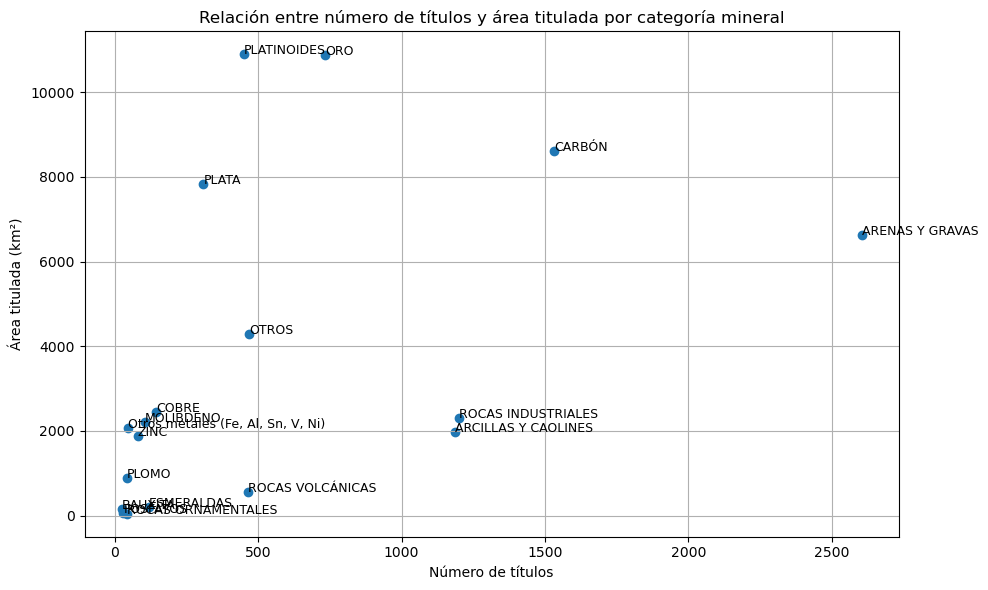

In [ ]:
#Grafica scatter
plt.figure(figsize=(10, 6))
plt.scatter(relacion_num_area['ETAPA'], relacion_num_area['AREA_KM2'])

for i, txt in enumerate(relacion_num_area.index):
    plt.annotate(txt, (relacion_num_area['ETAPA'].iloc[i], relacion_num_area['AREA_KM2'].iloc[i]), fontsize=9)

plt.title('Relación entre número de títulos y área titulada por categoría mineral')
plt.xlabel('Número de títulos')
plt.ylabel('Área titulada (km²)')

plt.grid(True)
plt.tight_layout()
plt.show()

### EXPLORACIÓN CANTIDAD TÍTULOS CONCESIONADOS POR DPTO

In [ ]:
top10

DEPARTAMEN
Antioquia             22.907828
Chocó                 15.515119
Cauca                 12.547035
Valle del Cauca       10.650505
La Guajira             8.306091
Bolívar                7.159721
Boyacá                 4.279966
Córdoba                2.941925
Norte de Santander     2.693730
Name: %_AREA, dtype: float64

In [ ]:
minerales_dpto_area = titulos_vigentes.groupby(['DEPARTAMEN', 'CATEGORIA_MINERAL']).agg({'ETAPA': 'count','AREA_HA': 'sum'})#.sort_values('AREA_HA', ascending=False)
minerales_dpto_area

ETAPA      AREA_HA
DEPARTAMEN      CATEGORIA_MINERAL                      
Antioquia       ARCILLAS Y CAOLINES    156   54584.4083
                ARENAS Y GRAVAS        354  139292.0061
                CARBÓN                  68   30414.4809
                COBRE                   56  115786.9909
                MOLIBDENO               39   97844.5668
...                                    ...          ...
Valle del Cauca ROCAS INDUSTRIALES     113   11808.8130
                ROCAS VOLCÁNICAS        55    7904.7116
Vaupés          ARENAS Y GRAVAS          1     362.2371
                ORO                      1     362.2371
Vichada         ARENAS Y GRAVAS          1      53.3501

[270 rows x 2 columns]

In [ ]:
minerales_dpto_area.loc['Chocó']

,ETAPA,AREA_HA
CATEGORIA_MINERAL,,
ARCILLAS Y CAOLINES,4,6684.1220
ARENAS Y GRAVAS,26,27235.1900
BAUXITA,1,1671.0305
CARBÓN,1,1671.0305
COBRE,47,74347.4669
MOLIBDENO,51,96722.1446
ORO,74,132237.3117
OTROS,46,76238.5987
PLATA,52,107008.2103


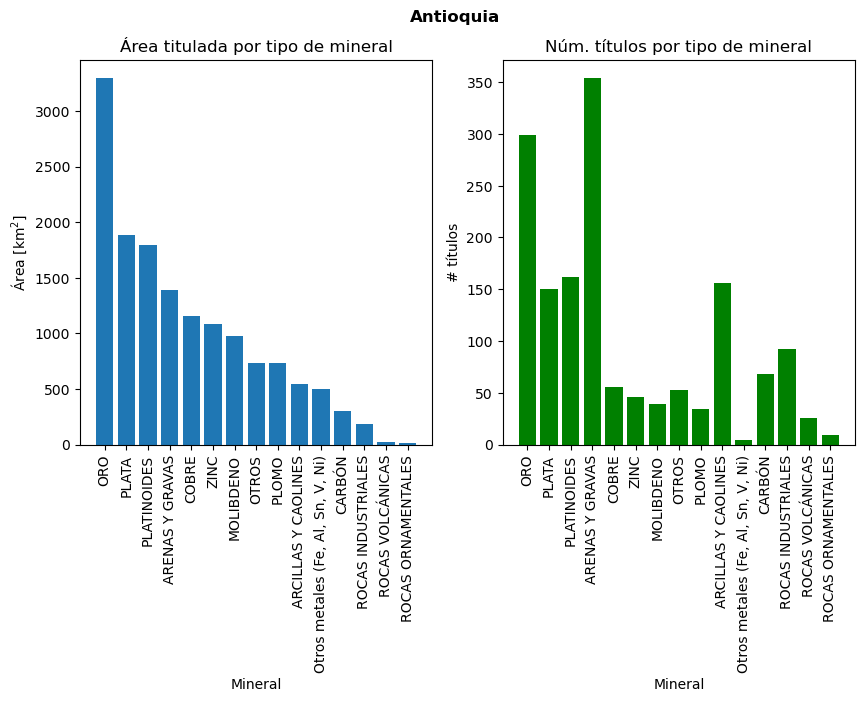

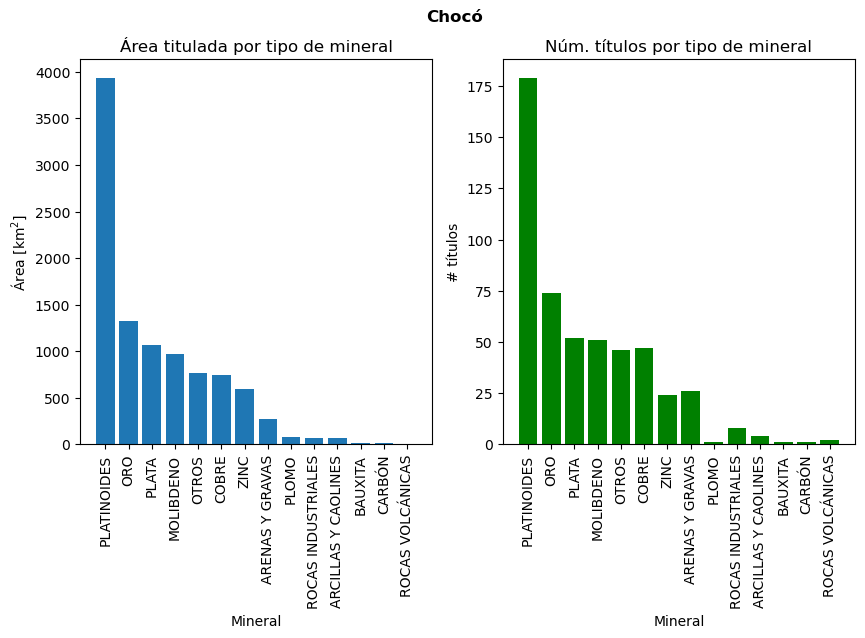

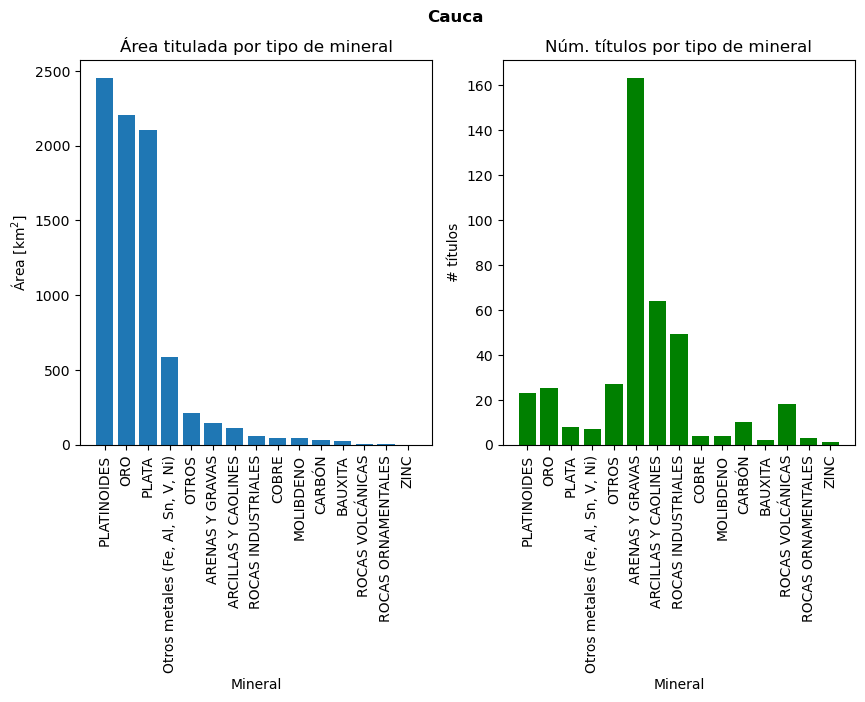

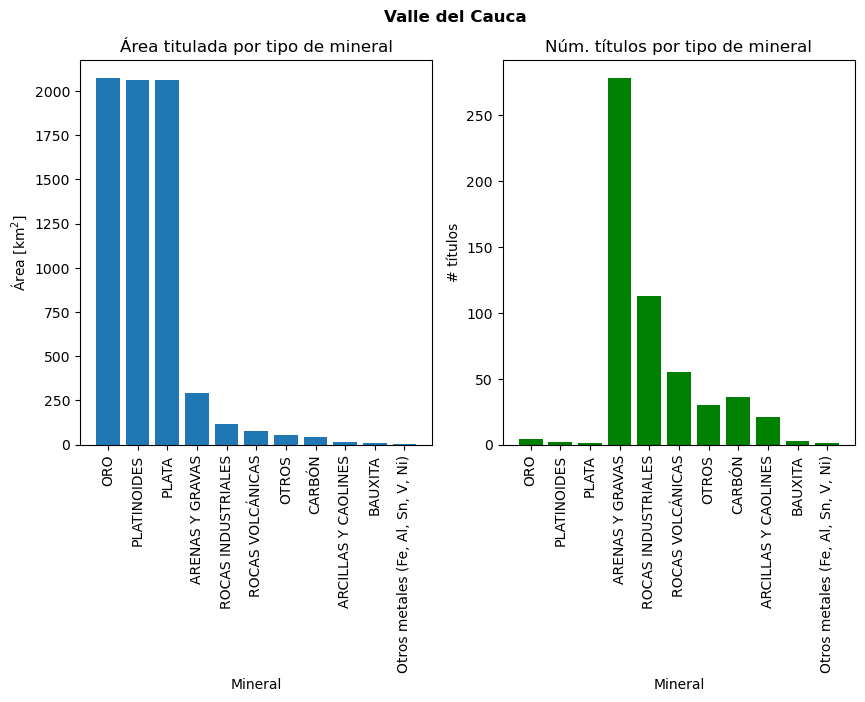

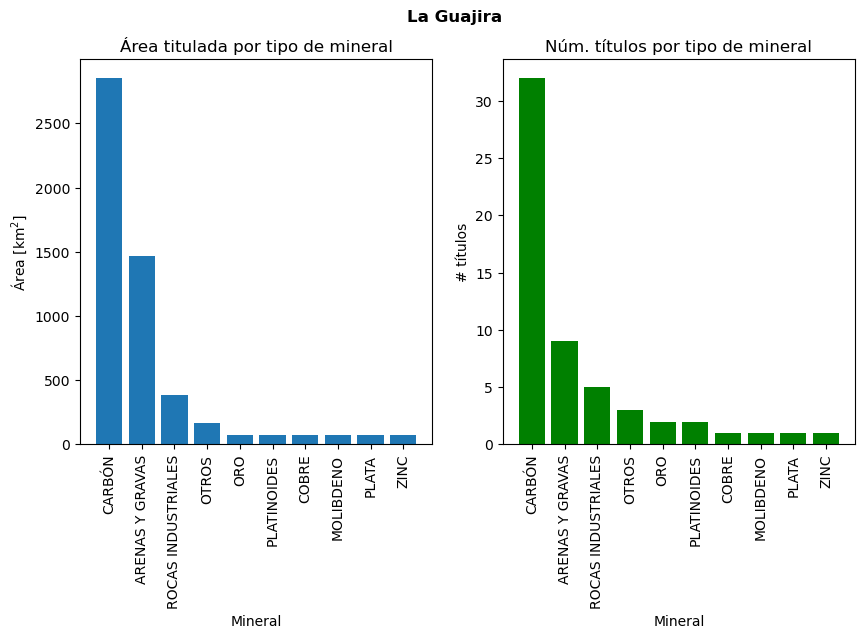

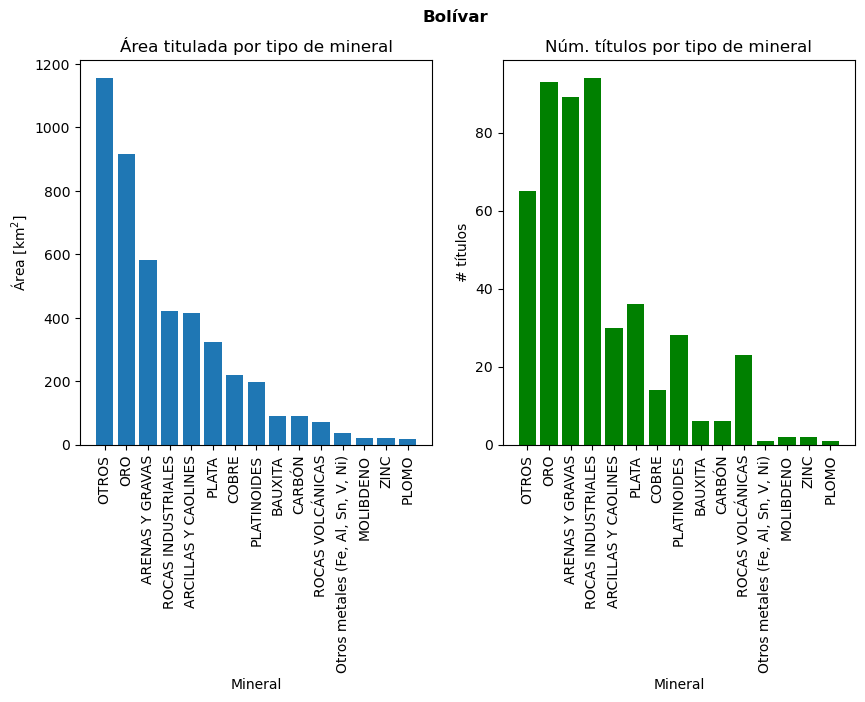

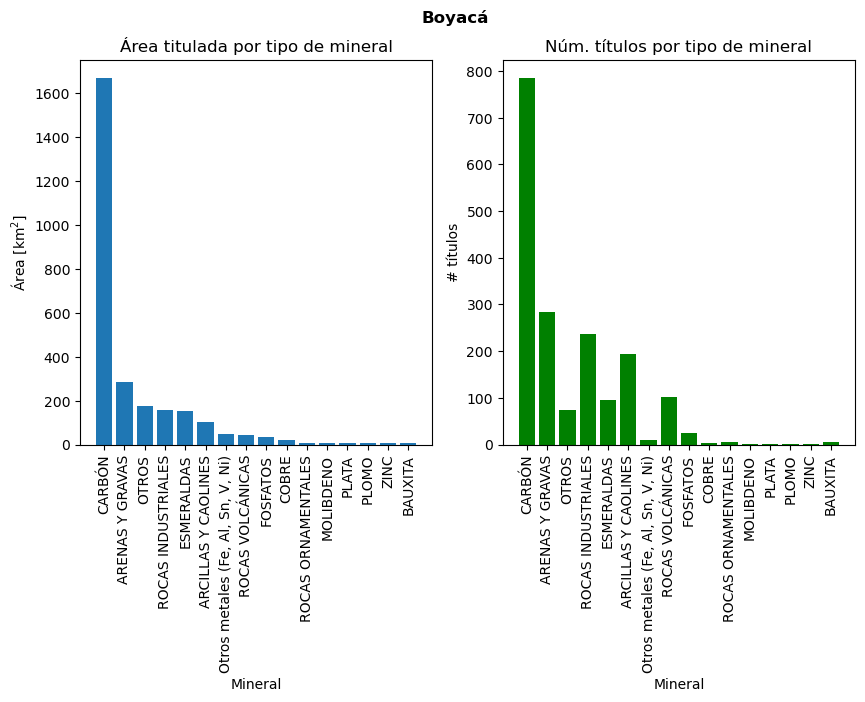

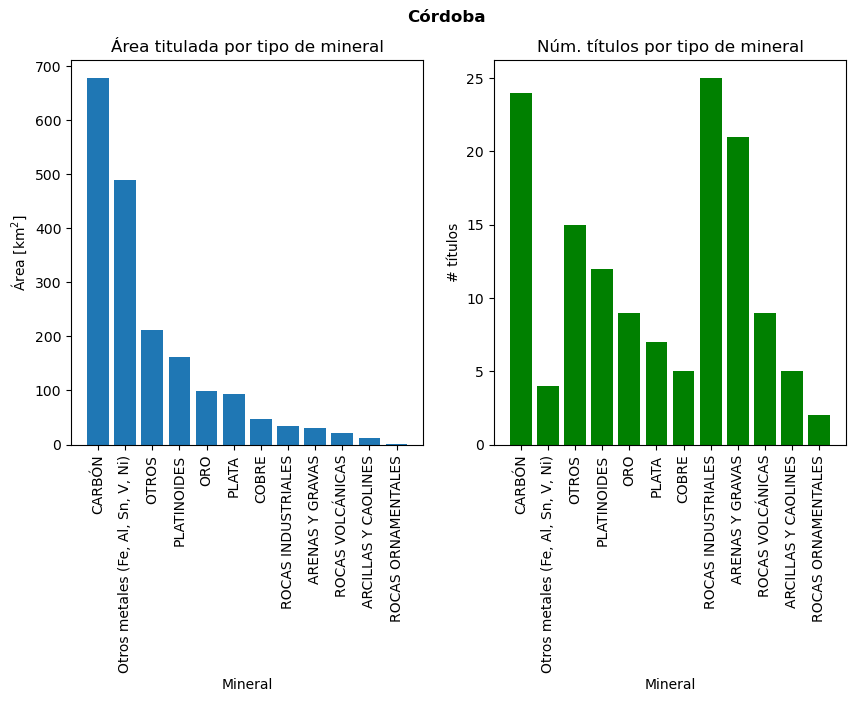

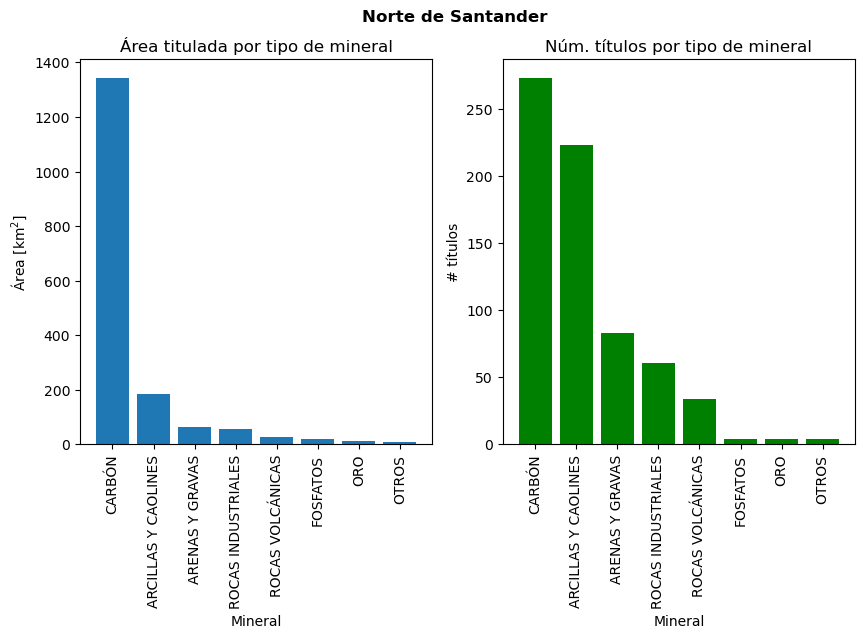

In [ ]:
#Graficar mayor área y títulos por dpto
departamentos = top10.index
for dpto in departamentos:
    df_dpto = minerales_dpto_area.loc[dpto].sort_values('AREA_HA', ascending=False)

    fig, ax = plt.subplots(1,2, figsize =(10,5))
    #Área titulada
    ax[0].bar(df_dpto.index, (df_dpto['AREA_HA']/100).values)
    ax[0].set_title(f'Área titulada por tipo de mineral')
    ax[0].set_xlabel('Mineral')
    ax[0].set_ylabel(f'Área [km$^2$]')
    ax[0].tick_params(axis='x', labelrotation=90)

    #Número de titulos
    ax[1].bar(df_dpto.index, df_dpto['ETAPA'].values, color = 'green')
    ax[1].set_title(f'Núm. títulos por tipo de mineral')
    ax[1].set_xlabel('Mineral')
    ax[1].set_ylabel(f'# títulos')
    ax[1].tick_params(axis='x', labelrotation=90)

    plt.suptitle(f'{dpto}', fontweight = 'bold')
